# Neural Networks PA1

- Class: CS440/640
- Name: Sai Santosh Kumar Ganti
- Team Members: Sai Santosh Kumar Ganti, Sahil Gupta

## Introduction

Here I will present my report for the programming assignment 1. I will include a copy of my jupyter notebook and python file in the github repository where this page is hosted as well. 


## Problem Definition

In this assignment, you need to build a neural network by yourself and implement the backpropagation algorithm to train it. 


## Implementation

#### Activation Functions

Below are my choices for the activation functions and the reason for choosing them: 

1. sigmoid function as activation function because its the most common function which can give the weighted sum between 0 and 1with some bias in it for it to be inactive and only fire when the threshold is reached.
2. softmax function because of its capability of converting output as probabilities.



#### Neural Network Specification: 

We will implement a simple 2 layer neural network with the following spec:

1. **Layer 1:**
   1. *Input:* Number of features
   2. *Output:* Number of Nodes in the hidden layer
   3. *Activation Function:*  Sigmoid Function
2. **Layer 2:** 
   1. *Input:* Number of Nodes in the hidden layer
   2. *Output:* Number of dimensions in the output 
   3. *Activation Function:*  None because the output here is passed through softmax function

#### Tasks: 

Below are the tasks performed: 

1. Seperating non-linear data
2. Seperating linear data and 
3. Recognizing the digits

#### Limitations

- This neural network will introduce some non-linearity in the analysis but it will not be scalable. 
- The network will only be able to understand the very simple non-linear functions. As we are using only 1 hidden layer, the network can introuce only 1 layer of non-linearity in the network.
-  To calculate more complex function, we can select a network with more number of nodes in hidden layer, but a better way to go about it to introduce more layers in the network.

In [7]:
# Import Python libraries
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

#### Helper Functions

1. sigmoid - This function gives the sigmoid of the input array 

2. sigmoid_derivative - This functions returns the derivative of the sigmoid function

3. softmax - This function gives the softmax of the input array

4. softmax_hoty - This function gives input softmax vector and returns the most probable class

5. k_fold - We will be using K-Fold from the Sklearn library and this function will take the input matrix i.e., provided data X, Y along with neural_network class object and returns sum of the test error. 

In [8]:
def sigmoid(t):
    return 1 / (1 + np.exp(-t))


def sigmoid_derivative(s):
    return s * (1 - s)


def softmax(z):
    exp_z = np.exp(z)
    softmax_scores = exp_z / np.sum(exp_z, axis=1, keepdims=True)
    return softmax_scores


def softmax_to_y(softmax_scores):
    return np.argmax(softmax_scores, axis=1)


def reLU(x):
    return x * (x > 0)


def reLU_derivative(x):
    return 1. * (x > 0)


def error_rate(y_pred, y_test):
    m = y_pred.shape[0]
    return np.sum(1 - (y_pred == y_test)) / m


def plot_decision_boundary(model, X, y):
    x1_array, x2_array = np.meshgrid(np.arange(-10, 10, 0.01), np.arange(-10, 10, 0.01))
    grid_coordinates = np.c_[x1_array.ravel(), x2_array.ravel()]
    Z = model.predict(grid_coordinates)
    Z = Z.reshape(x1_array.shape)
    plt.contourf(x1_array, x2_array, Z, cmap=plt.cm.bwr)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.show()



## Neural Networks Implementation

Below are the functions used for implementation:

1. **Forward Propagation:** Input is the feature vector. Below are the mathematical equations for it

$$hidden = X.W1 +B1$$
$$output = hidden.W2 + B2$$


2. **Back Propagation:**  Back propagation here is done with the help of gradient descent. Input here is the activation cache from forward propagation. X is the feature vector and y is the output vector. We backpropagate the derivatives backward. Also here we use the cross entropy loss and softmax function in the output layer. Below are the equations - 

$$outputError = output - oneHotY$$
$$outputDelta = outputError$$
$$hiddenError = outputDelta * (W2.T)$$
$$hiddenDelta = hiddenError * \frac{\partial hidden}{\partial sigmoid}$$

Updated Values: 

$$W2 = W2 - \alpha[(hidden.T).(outputDelta)/d]$$ 
$$W1 = W1 - \alpha[(X.T).hiddenDelta)/d]$$
$$B2 = B2 - \alpha*[\sum(outputDelta)/d]$$
$$B1 = B1 - \alpha*[\sum(hiddenDelta)/d]$$


3. **Compute_Cost:** Computes cost of the data set. This is the cost function which we hope to minimize after k epochs


4. **fit:** Computer the train error after completeing k epoch


5. **predict:** This is used after the neural network has been trained. 




In [12]:
class NN(object):

    def __init__(self, input_dimension, output_dimension, nodes, alpha=0.1, num_epochs=1000):
        # weights
        self.input_weight = np.random.randn(input_dimension, nodes) / np.sqrt(input_dimension)
        self.hidden_weight = np.random.randn(nodes, output_dimension) / np.sqrt(nodes)

        # bias
        self.input_bias = np.zeros((1, nodes))
        self.output_bias = np.zeros((1, output_dimension))
        self.alpha = alpha
        self.epochs = num_epochs

    def hyperparameters(self, alpha, epochs):
        self.alpha = alpha
        self.epochs = epochs

    def forward_propagation(self, X):
        # dot product of X (input) and first set
        self.hidden = reLU(np.dot(X, self.input_weight) + self.input_bias)
        # dot product of hidden layer and second set
        self.output = softmax(np.dot(self.hidden, self.hidden_weight) + self.output_bias)
        return self.output

    def backward_propagation(self, X, y):
        d = X.shape[0]
        one_hot_y = np.zeros_like(self.output)
        for i in range(y.shape[0]):
            one_hot_y[i, y[i]] = 1

        self.o_error = self.output - one_hot_y
        self.o_delta = self.o_error

        # error: how much hidden layer weights contributed to output error
        self.hid_error = self.o_delta.dot(self.hidden_weight.T)

        # applying derivative of reLu to hidden error
        self.hid_delta = self.hid_error * reLU_derivative(self.hidden)

        w2 = self.hidden.T.dot( self.o_delta) / d
        b2 = np.sum(self.o_delta, axis=0, keepdims=True) / d
        w1 = X.T.dot( self.hid_delta) / d
        b1 = np.sum(self.hid_delta, axis=0, keepdims=True) / d

        # Return updated gradients
        values = { "w1": w1,
                    "b1": b1,
                   "w2": w2,
                "b2": b2}
        return values

    # Updates the weights after calculating gradient in the self propagation step
    def update_weight(self, grads):
        self.input_bias -= self.alpha * grads["b1"]
        self.output_bias -= self.alpha * grads["b2"]
        self.input_weight -= self.alpha * grads["w1"]
        self.hidden_weight -= self.alpha * grads["w2"]

    # Computes the cross entropy between the actual and predicted values
    def compute_cost(self, o_z, y):
        m = y.shape[0]
        log_likelihood = -np.log(o_z[range(m), y])
        loss = np.sum(log_likelihood) / m
        return loss

    # Fits the neural network using the training dataset
    # Returns the training error for every 10th epoch
    def fit(self, X_train, y_train):
        train_error = [0.5]
        for i in range(self.epochs):
            output = self.forward_propagation(X_train)
            grads = self.backward_propagation(X=X_train, y=y_train)
            self.update_weight(grads)
            if (i % 10 == 0):
                # hot_y = softmax_to_y(output)
                train_error += [self.compute_cost(output, y_train)]
        return train_error

    # Fits the neural network using the training dataset,
    # calculates train as well as test error rate alongside
    def fit_test_train(self, X_train, y_train, X_test, y_test):
        train_error = []
        test_error = []
        for i in range(self.epochs):
            output_train = self.forward_propagation(X_train)
            grads = self.backward_propagation(X=X_train, y=y_train)
            self.update_weight(grads)
            if (i % 10 == 0):
                train_error += [self.compute_cost(output_train, y_train)]
                output_test = self.forward_propagation(X_test)
                test_error += [self.compute_cost(output_test, y_test)]
        error = [None] * 2
        error[0] = train_error
        error[1] = test_error
        return error

    def predict(self, X_test):
        output = self.forward_propagation(X_test)
        return softmax_to_y(output)

## K-Fold Cross Validation

In [10]:
def k_fold(X, y, k, nn):
    X = np.array_split(X, k)
    y = np.array_split(y, k)

    test_error = [None] * k

    for i in range(k):
        b = 0
        for j in range(k):
            if j == i:
                X_test = X[i]
                y_test = y[i]
            else:
                if b == 0:
                    X_train = X[j]
                    y_train = y[j]
                    b += 1
                else:
                    X_train = np.concatenate([X_train, X[i]])
                    y_train = np.concatenate([y_train, y[i]])
        nn.fit(X_train, y_train)
        y_pred = nn.predict(X_test)
        test_error[i] = error_rate(y_pred, y_test)
    return np.sum(test_error) / (k + 1)

## L2 Regularization

Any type of constrained optimization is regularization procedure. We could add a penality in the performance function which would indicate the complexity of a function.



- L1 Regularization
- L2 Regularization
- Dropout Regularization


#### L2 Regularization Implementation:

We are adding a term **lambdaweight** to the weight on every term. This is used because for L2 regularization, we add lambda/2* ( weight ) ^ 2 to the performace function. Derivative of this function is lambda * weight.

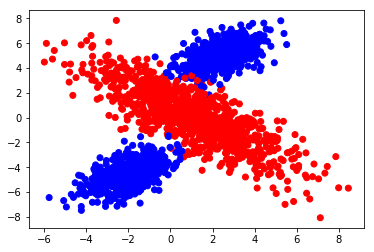

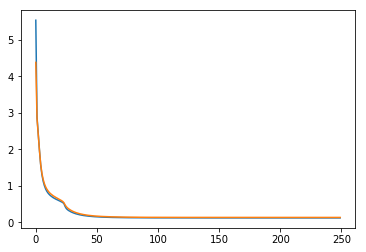

In [13]:
class regularizationL2(NN):

    def __init__(self, input_dimension, nodes, output_dimension, alpha=0.5, num_epochs=1000, reg_para=0.001):
        self.reg = reg_para
        super().__init__(input_dimension, nodes, output_dimension, alpha, num_epochs)

    def hyperparameter(self, alpha, num_epochs, reg_para):
        self.alpha = alpha
        self.num_epochs = num_epochs
        self.reg = reg_para

    def update_weight(self, grads):
        # Adding derivative of regularization term
        self.input_bias -= self.reg * self.input_bias
        self.output_bias -= self.reg * self.output_bias
        self.input_weight -= self.reg * self.input_weight
        self.hidden_weight -= self.reg * self.hidden_weight

        self.input_bias -= self.alpha * grads["b1"]
        self.output_bias -= self.alpha * grads["b2"]
        self.input_weight -= self.alpha * grads["w1"]
        self.hidden_weight -= self.alpha * grads["w2"]
        
def l2Regularization():
    X = np.genfromtxt('DATA/data_nonlinearX.csv', delimiter=',')
    y = np.genfromtxt('DATA/data_nonlineary.csv', delimiter=',').astype(np.int64)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.show()
    X, X_test, y, y_test = train_test_split(X, y, test_size=0.2)
    input_dim = int(X.shape[1])
    output_dim = int(y.max() + 1)
    nodes = 30
    nn = regularizationL2(input_dim, nodes, output_dim, alpha=0.1, num_epochs=2500)
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    err = nn.fit_test_train(X_train, y_train, X_test, y_test)

    train_err = err[0]
    test_err = err[1]

    plt.plot(train_err)
    plt.plot(test_err)
    plt.show()
l2Regularization()


## Non-Linear Data

The code below shows the scatter plot for non linear data. In this case, a lot of epochs are required since the function being calculated is complex.

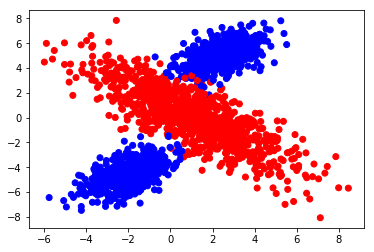

Error in test set is  2.0 %


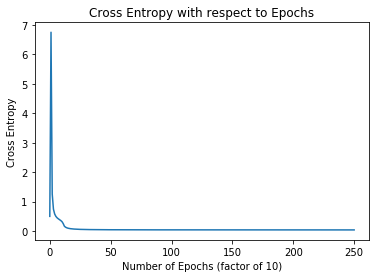

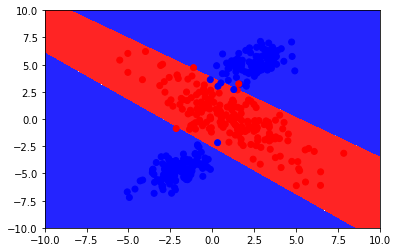

Confusion Matrix 

[[209   3]
 [  5 183]]
              precision    recall  f1-score   support

           0       0.98      0.99      0.98       212
           1       0.98      0.97      0.98       188

   micro avg       0.98      0.98      0.98       400
   macro avg       0.98      0.98      0.98       400
weighted avg       0.98      0.98      0.98       400

Average test error is : 0.012499999999999999


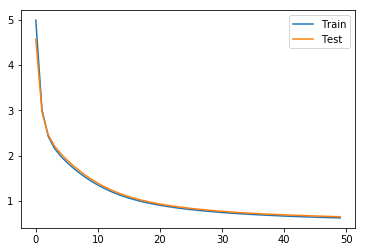

In [14]:
def non_linear():
    X = np.genfromtxt('DATA/data_nonlinearX.csv', delimiter=',')
    y = np.genfromtxt('DATA/data_nonlineary.csv', delimiter=',').astype(np.int64)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.show()
    X, X_test, y, y_test = train_test_split(X, y, test_size=0.2)
    input_dim = int(X.shape[1])
    output_dim = int(y.max() + 1)
    nodes = 30

    nn = NN(input_dim, nodes, output_dim, alpha=0.5, num_epochs=2500)
    train_err = nn.fit(X, y)

    y_pred = nn.predict(X_test)

    err = error_rate(y_pred, y_test)
    print("Error in test set is ", err * 100, "%")

    plt.plot(train_err)
    plt.title("Cross Entropy with respect to Epochs")
    plt.xlabel("Number of Epochs (factor of 10)")
    plt.ylabel("Cross Entropy")
    plt.show()

    # Even though the cross entropy is not minimized,
    # our system is able to distinguish the red points from the blue points easily
    # Plotting decision boundary
    plot_decision_boundary(nn, X_test, y_test)

    # Confusion matrix
    print("Confusion Matrix \n")
    print(confusion_matrix(y_pred, y_test))
    print(classification_report(y_pred, y_test))

    # Cross Validation score for the linear dataset
    X = np.genfromtxt('DATA/data_nonlinearX.csv', delimiter=',')
    y = np.genfromtxt('DATA/data_nonlineary.csv', delimiter=',').astype(np.int64)
    test_error = k_fold(X, y, 5, nn)
    print("Average test error is :", test_error)

    # Script for checking the test and train error
    X = np.genfromtxt('DATA/data_nonlinearX.csv', delimiter=',')
    y = np.genfromtxt('DATA/data_nonlineary.csv', delimiter=',').astype(np.int64)
    input_dim = int(X.shape[1])
    output_dim = int(y.max() + 1)

    nodes = 30

    nn = NN(input_dim, nodes, output_dim, alpha=0.05, num_epochs=500)
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    err = nn.fit_test_train(X_train, y_train, X_test, y_test)

    train_err = err[0]
    test_err = err[1]

    plt.plot(train_err)
    plt.plot(test_err)
    plt.legend(('Train', 'Test'))
    plt.show()
non_linear()

## Linear Data

The plots that the code shows below show that this is a linearly separable case. A lot of epochs are not needed to come up with suitable weights and having higher epochs may lead to the problem of overfitting

In [ ]:
def linear():
    X = np.genfromtxt('DATA/data_linearX.csv', delimiter=',')
    y = np.genfromtxt('DATA/data_lineary.csv', delimiter=',').astype(np.int64)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.bwr)
    plt.show()

    X, X_test, y, y_test = train_test_split(X, y, test_size=0.2)
    input_dim = int(X.shape[1])
    output_dim = int(y.max() + 1)
    nodes = 10

    nn = NN(input_dim, nodes, output_dim, alpha=0.05, num_epochs=500)
    train_err = nn.fit(X, y)

    y_pred = nn.predict(X_test)

    err = error_rate(y_pred, y_test)
    print("Error in test set is ", err * 100, "%")

    plt.plot(train_err)
    plt.title("Cross Entropy with respect to Epochs")
    plt.xlabel("Number of Epochs (factor of 10)")
    plt.ylabel("Cross Entropy")
    plt.show()

    # Even though the cross entropy is not minimized,
    # our system is able to distinguish the red points from the blue points easily
    # Plotting decision boundary
    plot_decision_boundary(nn, X_test, y_test)

    # Confusion matrix
    print("Confusion Matrix \n")
    print(confusion_matrix(y_pred, y_test))
    print(classification_report(y_pred, y_test))

    X = np.genfromtxt('DATA/data_linearX.csv', delimiter=',')
    y = np.genfromtxt('DATA/data_lineary.csv', delimiter=',').astype(np.int64)
    test_error = k_fold(X, y, 5, nn)
    print("Average test error is :", test_error)
linear()

## Digit Training

In [ ]:
def digitTraining():
    X = np.genfromtxt('DATA/Digit_X_train.csv', delimiter=',')
    y = np.genfromtxt('DATA/Digit_y_train.csv', delimiter=',').astype(np.int64)
    input_dim = int(X.shape[1])
    output_dim = int(y.max() + 1)
    nodes = 30

    nn = NN(input_dim, nodes, output_dim, alpha=0.05, num_epochs=2500)
    train_err = nn.fit(X, y)
    train_err.pop(0)

    X_test = np.genfromtxt('DATA/Digit_X_test.csv', delimiter=',')
    y_test = np.genfromtxt('DATA/Digit_y_test.csv', delimiter=',').astype(np.int64)

    y_pred = nn.predict(X_test)

    err = error_rate(y_pred, y_test)
    print(err)

    plt.plot(train_err)
    # plt.plot(test_err)
    plt.show()

    nn = regularizationL2(input_dim, nodes, output_dim, alpha=0.1, num_epochs=2500)
    X_train, X_test, y_train, y_test = train_test_split(X, y)
    err = nn.fit_test_train(X_train, y_train, X_test, y_test)

    train_err = err[0]
    test_err = err[1]
    plt.plot(train_err)
    plt.plot(test_err)
    plt.show()
digitTraining()

## Learning rates

What effect does the learning rate have on how your neural network is trained? Illustrate your answer by training your model using different learning rates. Use a script to generate output statistics and visualize them. (5pts)

Learning rate controls the weights of our network with respect the loss gradient. The speed at which we travel the slope is determined by the learning rate. If we choose the lower value of learning rate, we travel the slope slowly.

Relationship between learning rate and weights of our network - 
   new_weight = existing_weight — learning_rate * gradient

We need to choose the optimum learning rate for our system to perform best.

For learning rate .001, we get error - 0.899888765294772
For learning rate .05, we get error - 0.0967741935483871
For learning rate .01, we get error - 0.39154616240266965
For learning rate .5, we get error - 0.07119021134593993
For learning rate  1, we get error - 0.12791991101223582
For learning rate  5, we get error - 0.8987764182424917
For learning rate 10, we get error - 0.899888765294772
For learning rate 15, we get error - 0.8987764182424917


We start with lower value our error rate is high, as we increase our learning rate to 1 our error rate gets to minimum. As we keep increasing the value of our rate, the error rate increases. So we have to find the optimum error rate.




In [15]:
lrs=[.001,.05,.01,.5,1,5,10,15]
errors=[]
for i in lrs:
    print('Learning Rate: -'+str(i))
    X = np.genfromtxt('DATA/Digit_X_train.csv', delimiter=',')
    y = np.genfromtxt('DATA/Digit_y_train.csv', delimiter=',').astype(np.int64)
    m = X.shape[0] 
    input_dim = int(X.shape[1])
    output_dim = int(y.max() + 1)
    nodes = 20
    nn=NN(input_dim,  nodes , output_dim,alpha=i)
    train_err = nn.fit(X,y)
    X_test = np.genfromtxt('DATA/Digit_X_test.csv', delimiter=',')
    y_test = np.genfromtxt('DATA/Digit_y_test.csv', delimiter=',').astype(np.int64)

    y_pred = nn.predict(X_test)

    error_rate1 = nn.compute_cost(y_pred,y_test)
    errors.append(error_rate1)
    print("Error Rate:- "+str(error_rate1))
    plt.plot(train_err)
    plt.title('Train Error')
    plt.xlabel('No. of epochs')
    plt.ylabel("Error")
    plt.show()

Learning Rate: -0.001


IndexError: too many indices for array